<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Teste_chi%5E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.interpolate import interp1d

In [157]:
x = np.array([2, 6, 7])
y = np.array([3.5, 5.2, 8])
e = np.array([0.4, 0.8, 1.2])

def f(x, a, b):
  return b*x + a

In [158]:
# ajuste da função

popt, pcov = curve_fit(f, x, y, sigma=e, p0=[0., 0.], bounds=([0., 0.], [10., 10.]), method='trf')

p1 = popt[0]
p2 = popt[1]

print(popt[0])
print(popt[1])

1.3694172146228669e-10
2.3651120545729143e-10


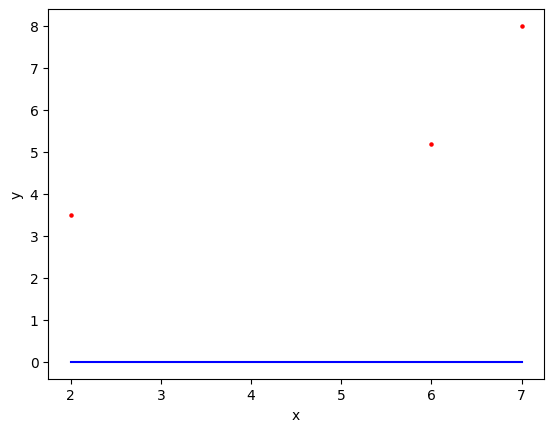

In [159]:
plt.scatter(x, y, s=5, color="red")
plt.plot(x, f(x, *popt), color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Outro teste:

In [160]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([-3,2,7,12,17,22,27,32,37,42])
e = np.array([0.4, 0.8, 1.2, 1.2, 1.5,2.3,2.8,3,3.7,4.1])

def g(x, a, b):
  return b*x + a

1.1689742505879482e-10
2.404082512759931e-10


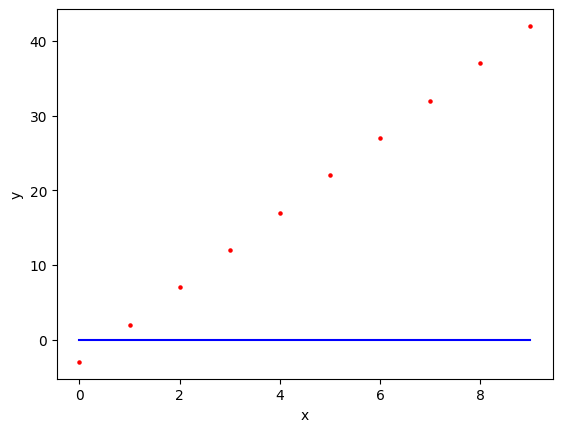

In [161]:
# ajuste da função

popt, pcov = curve_fit(g, x, y, sigma=e, p0=[0., 0.], bounds=([0., 0.], [10., 10.]), method='trf')

p1 = popt[0]
p2 = popt[1]

print(popt[0])
print(popt[1])

plt.scatter(x, y, s=5, color="red")
plt.plot(x, g(x, *popt), color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Outro teste:

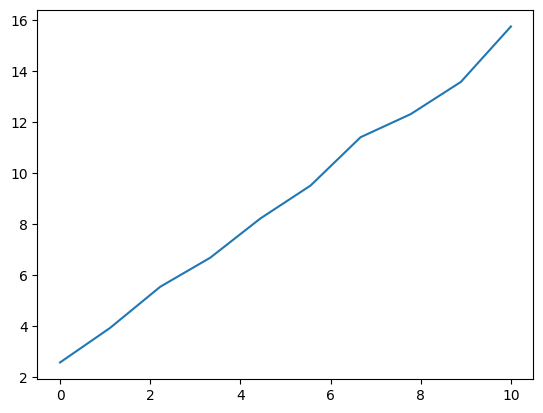

In [162]:
def func(x, a, b):
  return a + b*x

xdata = np.linspace(0, 10, 10)
y = func(xdata, 2.5, 1.3)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise

e = 2*np.ones(len(xdata))

plt.plot(xdata, ydata)
plt.show()

2.533666143379063
1.2848913934586106


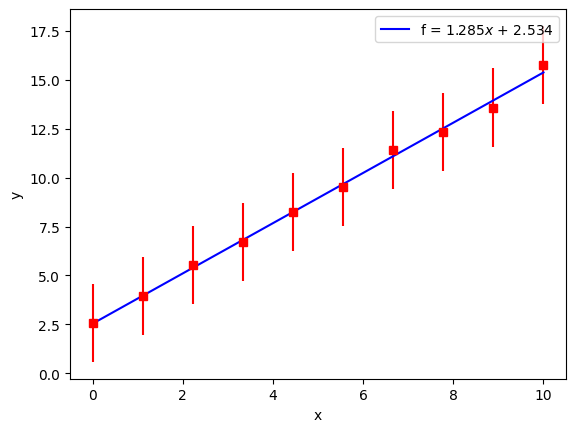

In [163]:
popt, pcov = curve_fit(func, xdata, ydata)

p1 = popt[0]
p2 = popt[1]

print(popt[0])
print(popt[1])

plt.errorbar(xdata, ydata, e, fmt='s', color="red")
plt.plot(xdata, func(xdata, *popt), color='blue', label=r'f = '+str(np.round(p2, 3))+ '$x$ + ' +str(np.round(p1, 3))  )
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [164]:
print(xdata)
print(ydata)
print(e)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
[ 2.57677304  3.93442583  5.54714828  6.68998084  8.22859079  9.51838689
 11.41683179 12.3228484  13.58484815 15.76139709]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [165]:
chi2 = np.sum( ( (ydata - func(xdata, *popt)) ** 2) / (e**2))
print(chi2)

0.1225860144575188


Outro teste:

[4.8684227  3.72302325]
[0.1375274  0.76417483]
0.7861043010470139


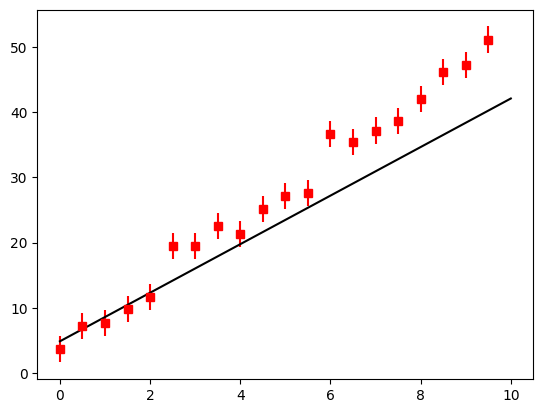

In [166]:
def h(x, a, b):

    return (a * x) + b

a = 5.
b = 2.

xi = np.linspace(0, 10, 10)

#plt.plot(xi, f(xi, a, b))

x = np.arange(0, 10, 0.5)
y = np.random.normal(h(x, a, b), 1.9)

e = 2*np.ones(len(x))


plt.errorbar(x, y, e, fmt='s', color='red')


popt, pcov = curve_fit(h, x, y, sigma=e)

plt.plot(xi, f(xi, *popt), color='black')

erro = np.sqrt(np.diag(pcov))

print(popt)
print(erro)

chi2r = np.sum(((y-h(x, *popt)) ** 2) / (e**2)) / (len(x)-2.)

#X.append(chi2r)

print(chi2r)
#plt.hist(X, bins=20)
